In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\pramo\Desktop\jupyter project\EDA\AB_NYC_2019.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
#changing the datatype
df["id"]=df["id"].astype(str)
df["host_id"]=df["host_id"].astype(str)
df["latitude"]=df["latitude"].astype(str)
df["longitude"]=df["longitude"].astype(str)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  object 
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  object 
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  object 
 7   longitude                       48895 non-null  object 
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

How does the data look mathematically?

In [38]:
df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Dealing with categorical data

In [12]:
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [13]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [15]:
df["room_type"].value_counts()  #gives the number of values available in specific column

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

In [16]:
df["room_type"].value_counts(normalize = True) #normalize function helps in giving percentage share of certain value

room_type
Entire home/apt    0.519665
Private room       0.456611
Shared room        0.023724
Name: proportion, dtype: float64

In [17]:
df["neighbourhood_group"].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

## Dealing with numerical data

In [18]:
df["price"].value_counts(bins = 5)  # bins are used to divide the interval and gives the no of values within the range

(-10.001, 2000.0]    48809
(2000.0, 4000.0]        54
(4000.0, 6000.0]        16
(6000.0, 8000.0]         9
(8000.0, 10000.0]        7
Name: count, dtype: int64

In [20]:
bins = [-10,0, 50,100, 200,500,800,2000,4000,10000]
df["price"].value_counts(bins = bins) #It is mainly helpful in small datasets.

(50.0, 100.0]        17367
(100.0, 200.0]       16583
(200.0, 500.0]        7340
(0.0, 50.0]           6550
(500.0, 800.0]         624
(800.0, 2000.0]        334
(2000.0, 4000.0]        54
(4000.0, 10000.0]       32
(-10.001, 0.0]          11
Name: count, dtype: int64

## Measures of central tendancyy

In [28]:
df["price"].mean()

152.7206871868289

In [29]:
df["price"].median(),


(106.0,)

In [30]:
df["price"].std()

240.15416974718758

In [31]:
df["minimum_nights"].mean()

7.029962163820431

In [32]:
df["minimum_nights"].median()

3.0

## Measure of Spread

In [33]:
df["price"].skew()

19.118938995046033

In [34]:
df["price"].kurt()

585.6728788988286

## Univariate visualizations (Categorical)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\pramo\Desktop\jupyter project\EDA\AB_NYC_2019.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Categorical

## Bar Graph

<Axes: xlabel='neighbourhood_group', ylabel='count'>

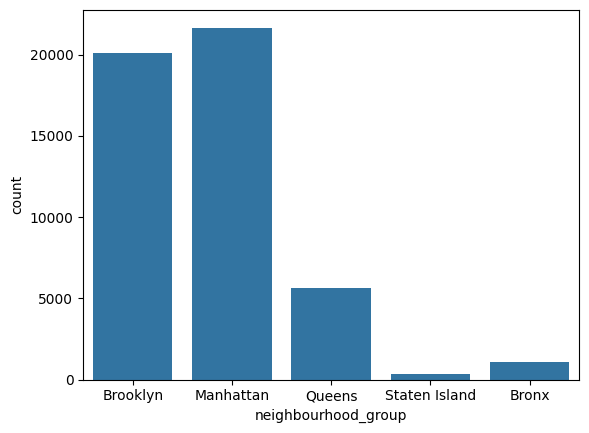

In [4]:
sns.countplot(x=df['neighbourhood_group'])

<Axes: xlabel='neighbourhood_group', ylabel='count'>

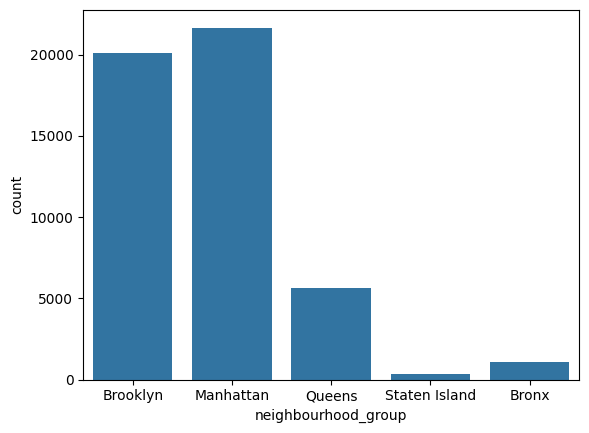

In [6]:
sns.countplot(data= df , x='neighbourhood_group')

<Axes: xlabel='neighbourhood_group', ylabel='count'>

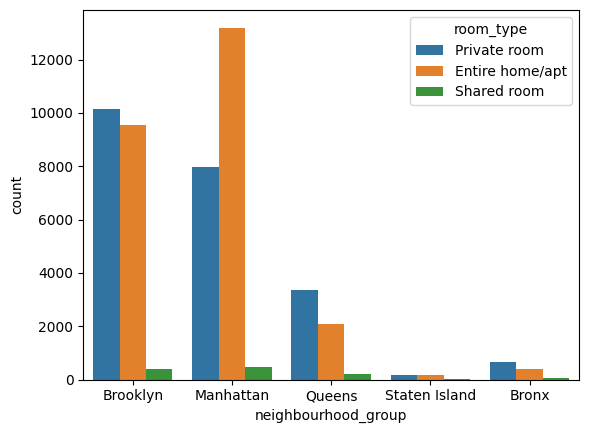

In [7]:
# hue parameter in a plot like sns.countplot(), it allows you to add an additional categorical variable 
sns.countplot(data = df, x ="neighbourhood_group" , hue = "room_type")

# Pie Chart

<Axes: ylabel='count'>

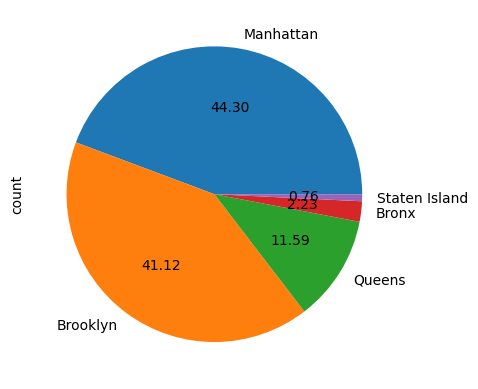

In [12]:
df['neighbourhood_group'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: xlabel='neighbourhood_group'>

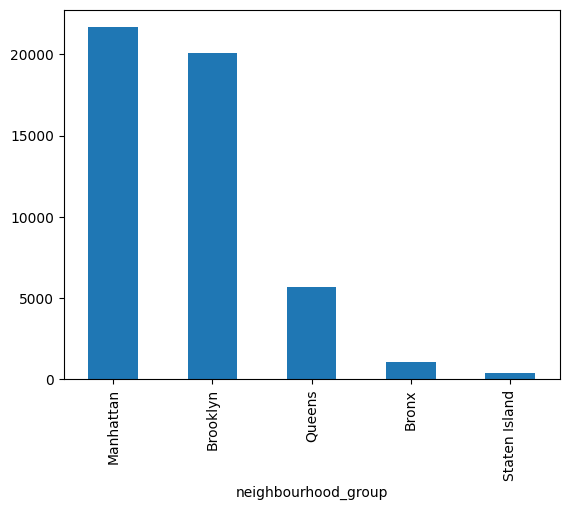

In [15]:
df['neighbourhood_group'].value_counts().plot(kind='bar')

## on real time dataset

In [18]:
df2 = sns.load_dataset("titanic")

In [19]:
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='survived', ylabel='count'>

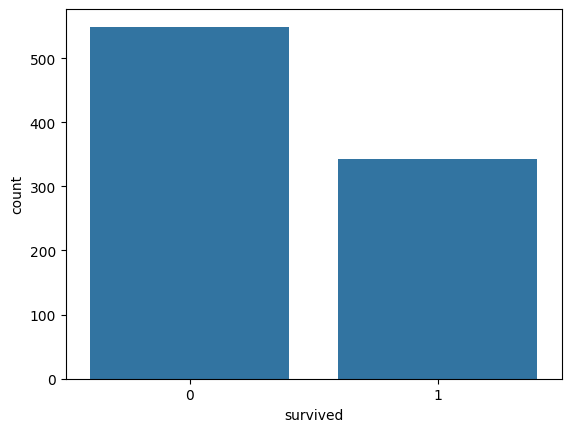

In [22]:
sns.countplot(x= df2['survived'])

<Axes: xlabel='embark_town', ylabel='count'>

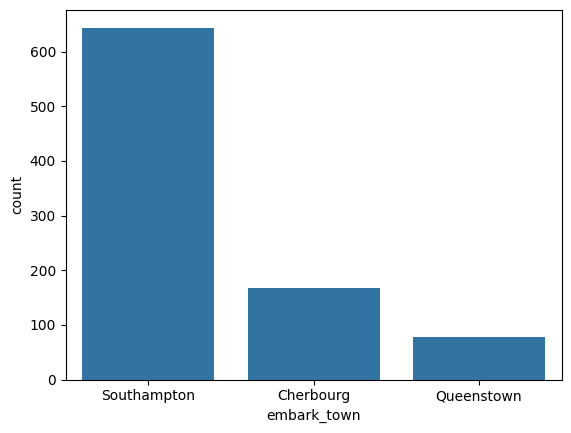

In [23]:
sns.countplot(x = df2["embark_town"])

<Axes: xlabel='embark_town', ylabel='count'>

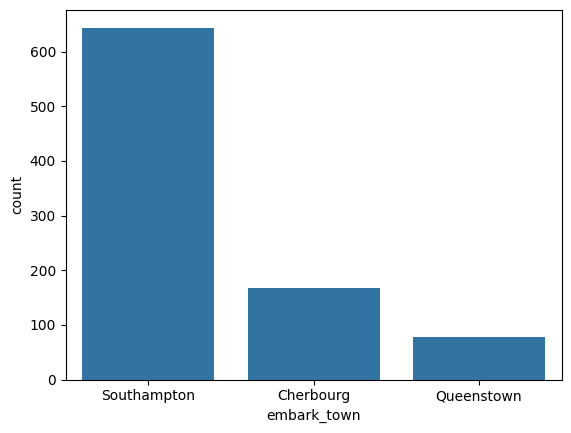

In [24]:
sns.countplot(data= df2,x="embark_town")

<Axes: ylabel='count'>

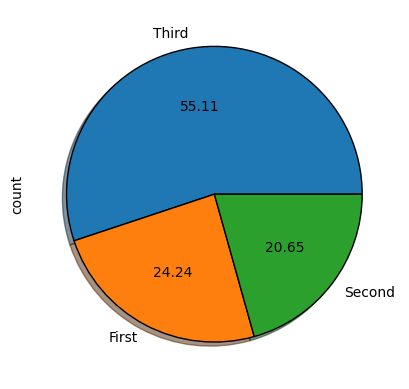

In [33]:

df2["class"].value_counts().plot(kind = "pie", autopct = "%.2f",shadow= True, wedgeprops=dict(edgecolor='black'))

# Univariate visualizations (Numerical)

In [19]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [20]:
df = pd.read_csv(r"C:\Users\pramo\Desktop\jupyter project\EDA\AB_NYC_2019.csv")

In [21]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


## Histogram

<Axes: xlabel='price', ylabel='Count'>

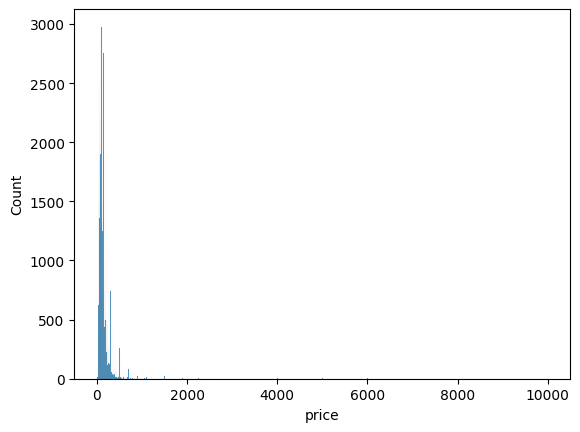

In [22]:
sns.histplot(df["price"])

<Axes: xlabel='price', ylabel='Count'>

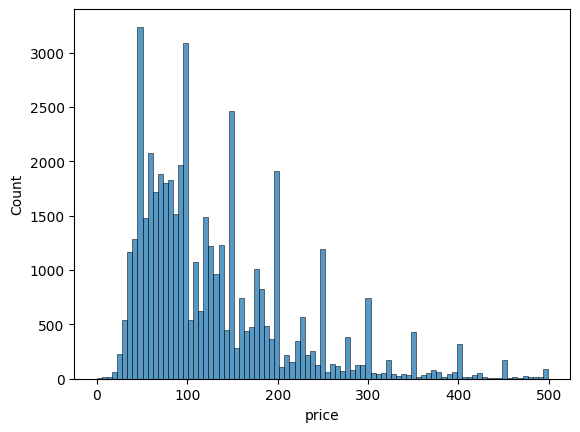

In [23]:
sns.histplot(df[df["price"]<500]["price"])

## Distplot

C:\Users\pramo\AppData\Local\Temp\ipykernel_10832\50337492.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"])


<Axes: xlabel='price', ylabel='Density'>

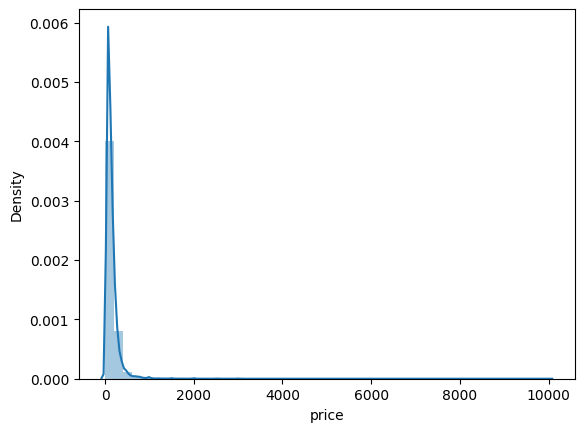

In [24]:
sns.distplot(df["price"])

<Axes: ylabel='price'>

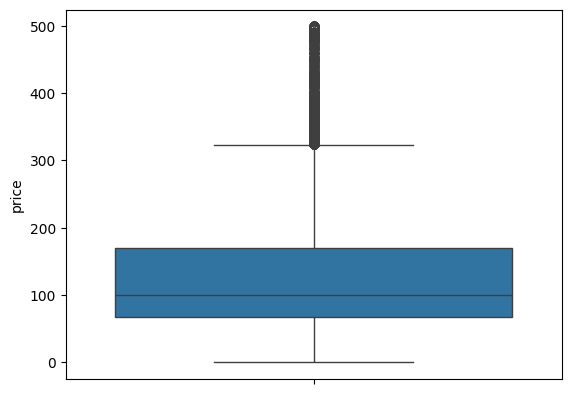

In [27]:
sns.boxplot(df[df["price"]<500]["price"])

<Axes: ylabel='reviews_per_month'>

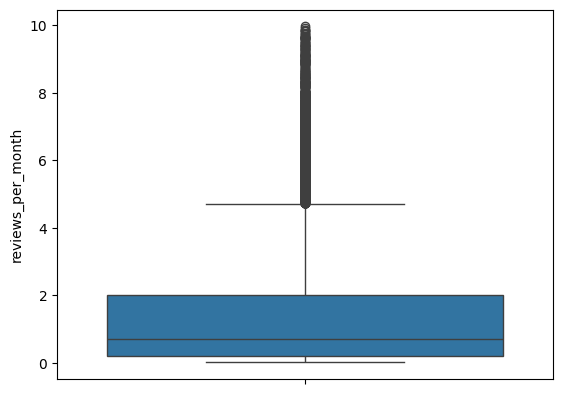

In [28]:
sns.boxplot(df[df["reviews_per_month"]<10]["reviews_per_month"])

In [29]:
df2 = sns.load_dataset("titanic")

In [30]:
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [31]:
df2[df2["fare"]==0]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
179,0,3,male,36.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
263,0,1,male,40.0,0,0,0.0,S,First,man,True,B,Southampton,no,True
271,1,3,male,25.0,0,0,0.0,S,Third,man,True,NaN,Southampton,yes,True
277,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
302,0,3,male,19.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
413,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
466,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
481,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
597,0,3,male,49.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
633,0,1,male,NaN,0,0,0.0,S,First,man,True,NaN,Southampton,no,True


C:\Users\pramo\AppData\Local\Temp\ipykernel_10832\49255041.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2["age"])


<Axes: xlabel='age', ylabel='Density'>

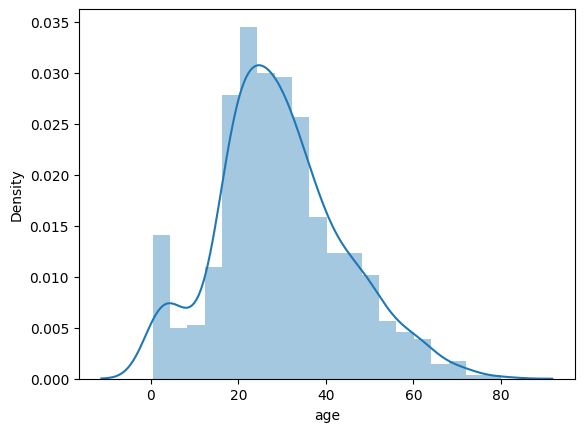

In [32]:
sns.distplot(df2["age"])

C:\Users\pramo\AppData\Local\Temp\ipykernel_10832\3524834500.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2["fare"])


<Axes: xlabel='fare', ylabel='Density'>

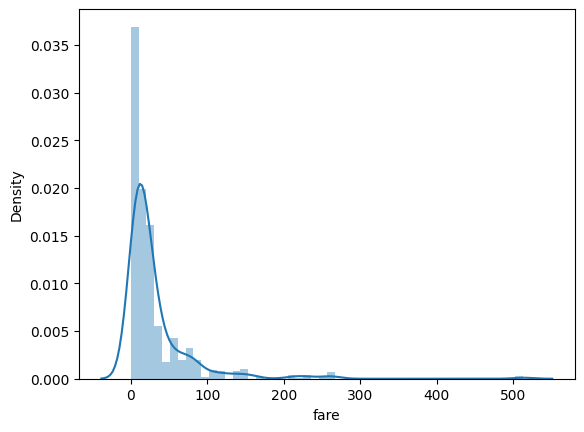

In [33]:
sns.distplot(df2["fare"])

<Axes: ylabel='age'>

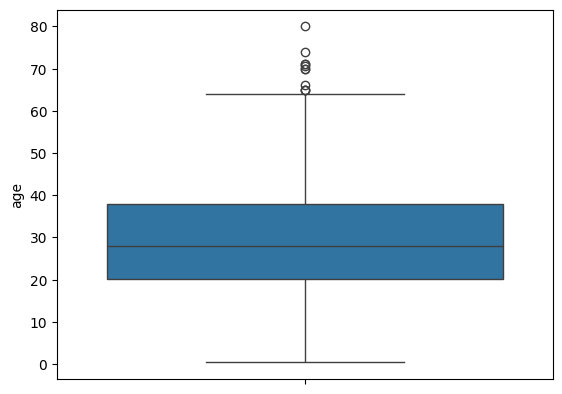

In [34]:
sns.boxplot(df2["age"])

<Axes: ylabel='fare'>

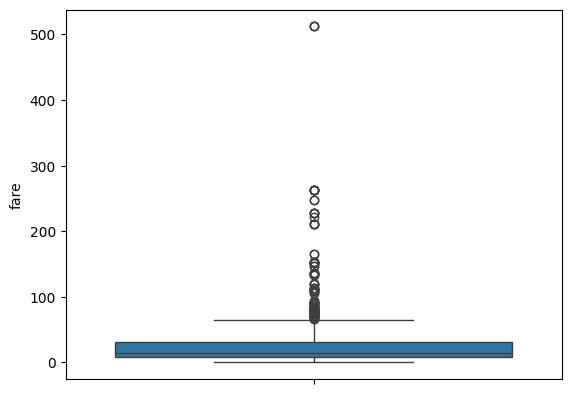

In [35]:
sns.boxplot(df2["fare"])

#  Bivariate Categorical & Numerical

In [36]:
import pandas as pd
import seaborn as sns

In [37]:
df = sns.load_dataset("titanic")

In [38]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='class', ylabel='age'>

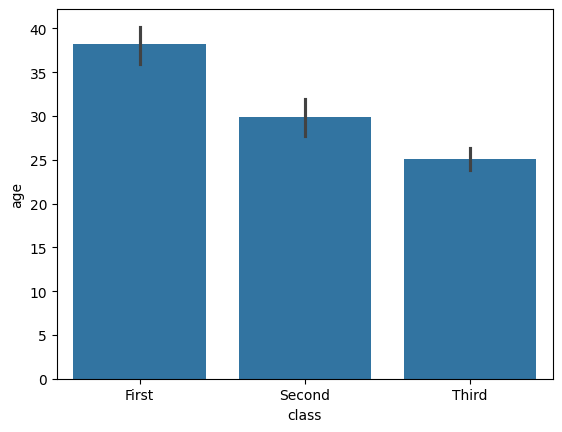

In [39]:
sns.barplot(x ="class", y= "age", data = df)

<Axes: xlabel='class', ylabel='age'>

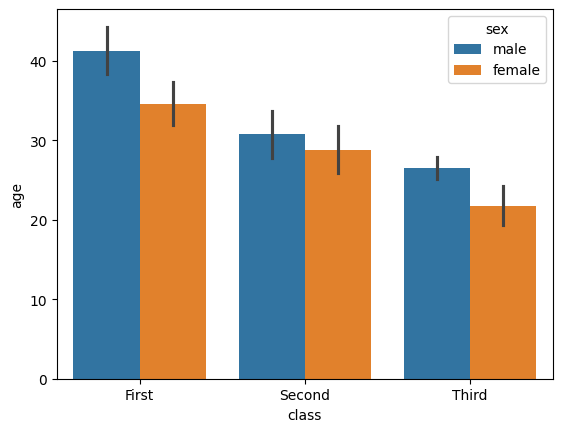

In [40]:
sns.barplot(x ="class", y= "age",hue = "sex", data = df)

<Axes: xlabel='class', ylabel='age'>

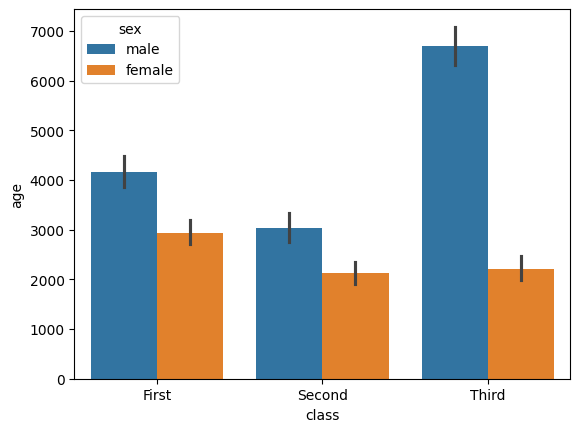

In [41]:
sns.barplot(x ="class", y= "age",hue = "sex",estimator="sum", data = df)

<Axes: xlabel='sex', ylabel='age'>

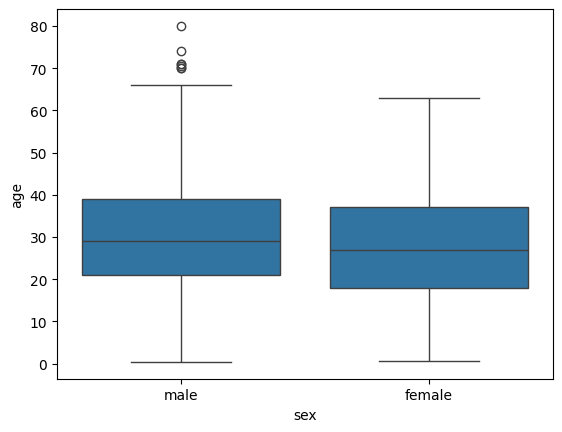

In [42]:
sns.boxplot(x = "sex", y= "age", data = df)

<Axes: xlabel='sex', ylabel='age'>

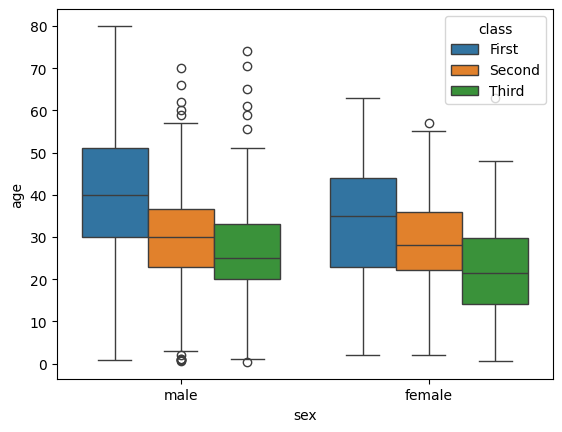

In [43]:
sns.boxplot(x = "sex", y= "age", hue = "class", data = df)

C:\Users\pramo\AppData\Local\Temp\ipykernel_10832\3415191796.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["survived"]==0]["age"], hist = False)
C:\Users\pramo\AppData\Local\Temp\ipykernel_10832\3415191796.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["survived"]

<Axes: xlabel='age', ylabel='Density'>

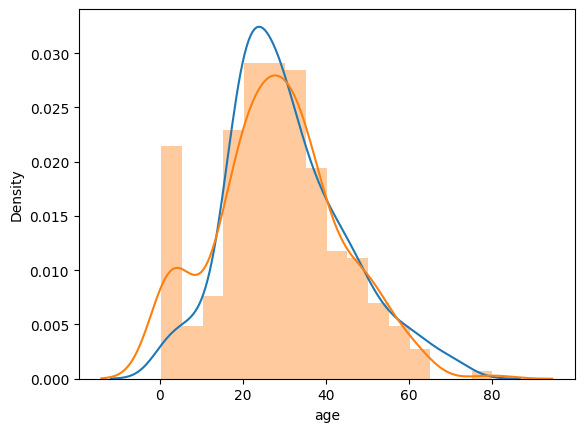

In [45]:
sns.distplot(df[df["survived"]==0]["age"], hist = False)
sns.distplot(df[df["survived"]==1]["age"], hist = True)

# Bivariate categorical 

In [46]:
import pandas as pd
import seaborn as sns

In [47]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [48]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='sex', ylabel='age'>

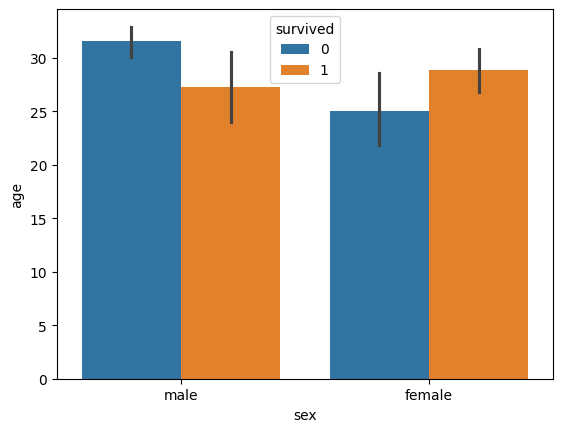

In [49]:
sns.barplot(x = "sex", y= "age",hue = "survived" ,data = df)

<Axes: xlabel='class', ylabel='age'>

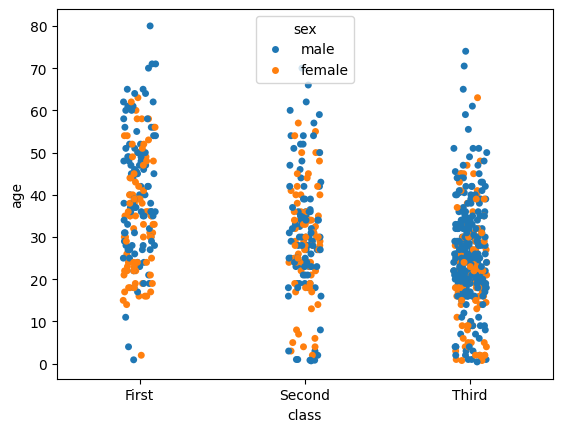

In [50]:
sns.stripplot(x="class", y= "age",hue = "sex", data = df)

In [52]:
x = pd.crosstab(df["class"],df["survived"])

<Axes: xlabel='survived', ylabel='class'>

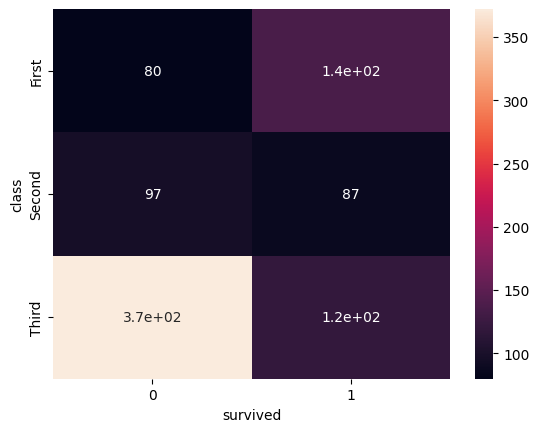

In [54]:
sns.heatmap(x,annot= True)

In [55]:
df2 = sns.load_dataset("iris")
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: >

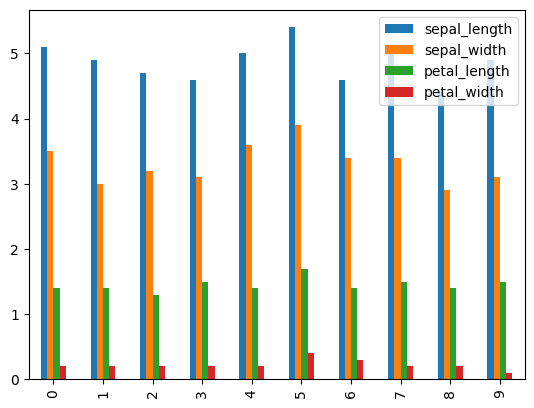

In [56]:
df2.head(10).plot(kind = "bar")

<Axes: >

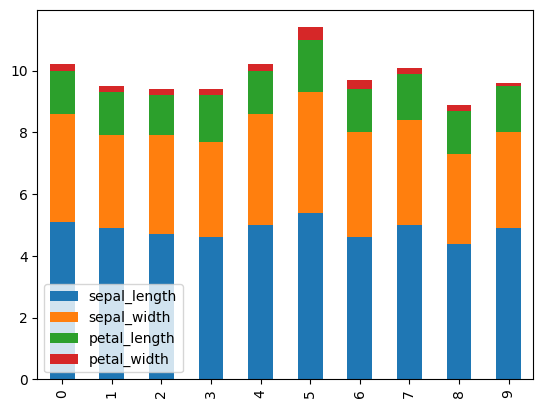

In [57]:
df2.head(10).plot(kind = "bar", stacked = True)

# Bivariate numerical

In [58]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [59]:
df = sns.load_dataset("titanic")

In [60]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='age', ylabel='fare'>

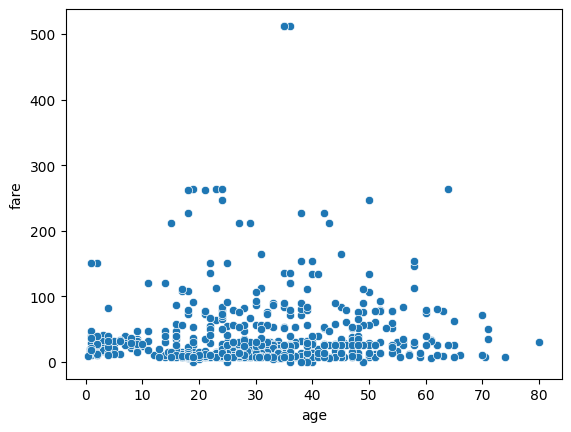

In [61]:

sns.scatterplot(x="age", y = "fare", data = df)

In [62]:
df2 = sns.load_dataset("tips")
df2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

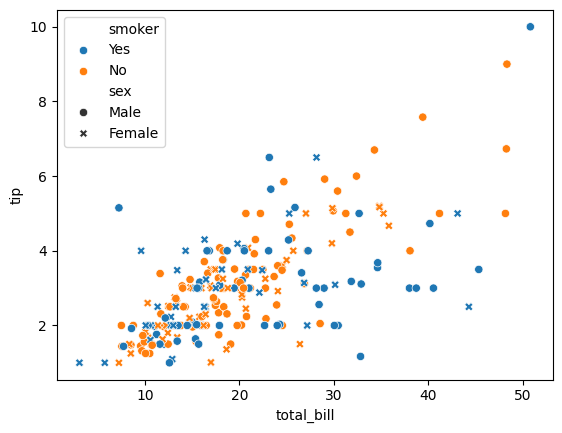

In [63]:
sns.scatterplot(x= "total_bill", y= "tip", hue = "smoker",style = "sex", data = df2)


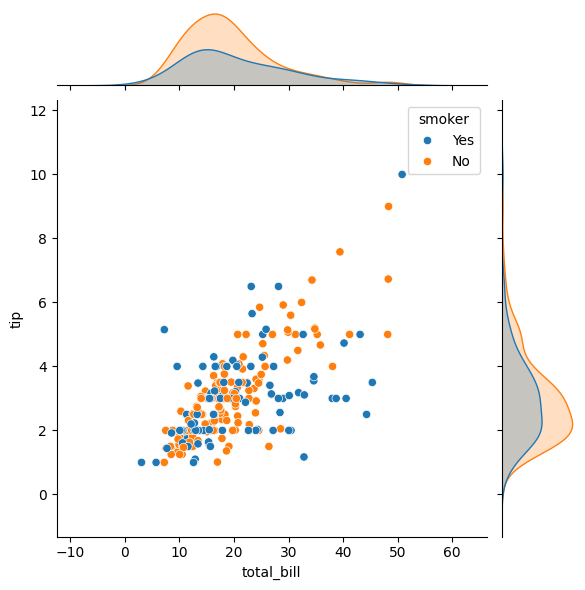

In [64]:

sns.jointplot(x= "total_bill", y= "tip",hue = "smoker" ,data = df2)

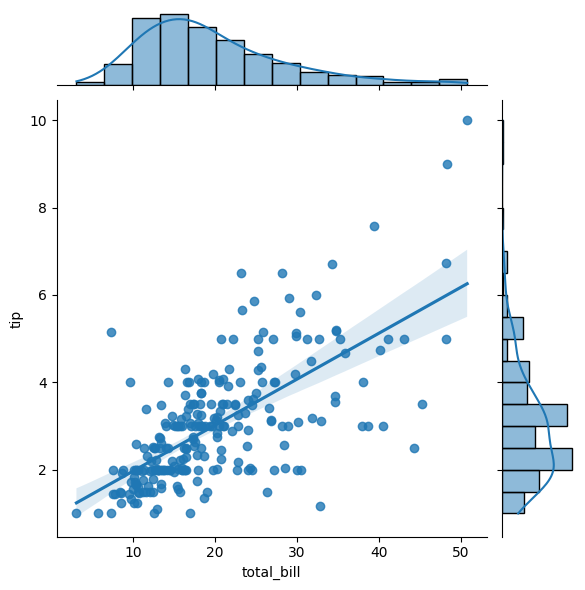

In [65]:

sns.jointplot(x= "total_bill", y= "tip",data = df2, kind ="reg")

In [66]:
df = sns.load_dataset("dowjones")
df.head()

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45


<Axes: xlabel='Date', ylabel='Price'>

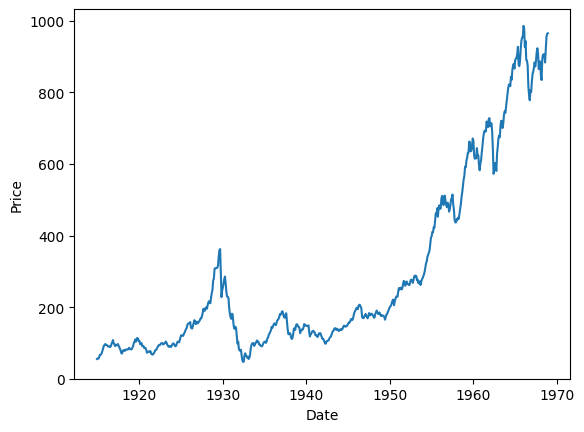

In [67]:
sns.lineplot(x = "Date", y= "Price", data = df)

<Axes: xlabel='Date', ylabel='Price'>

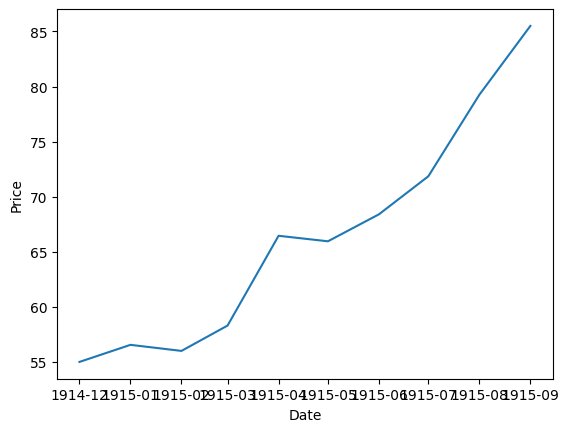

In [68]:
sns.lineplot(x = "Date", y= "Price", data = df.head(10))

In [69]:
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month

In [70]:
df.head()

,Date,Price,year,month
0,1914-12-01,55.00,1914,12
1,1915-01-01,56.55,1915,1
2,1915-02-01,56.00,1915,2
3,1915-03-01,58.30,1915,3
4,1915-04-01,66.45,1915,4


<Axes: xlabel='month', ylabel='Price'>

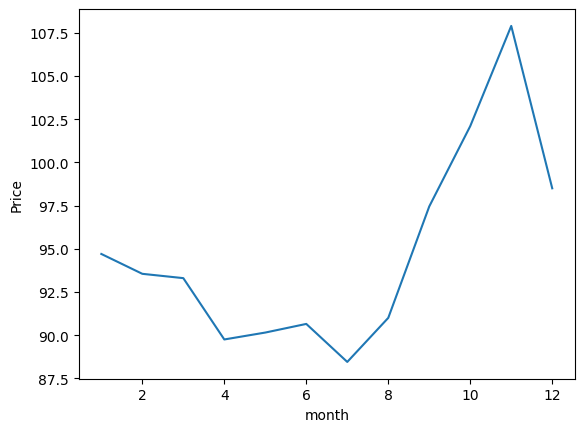

In [71]:
sns.lineplot(x = "month", y= "Price", data = df[df["year"]==1916])